## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten
# Datenanalyse der begleitenden Lehrendenbefragung 2017/18

#### Daten importieren

In [1]:
import pandas as pd
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten1 = pd.read_excel('D:\Daten\DISS\Daten\Estrategias_Profesores_Kienberger_P2017_int.xlsx', encoding='utf-16')

In [19]:
Daten2 = pd.read_excel('D:\Daten\DISS\Daten\Estrategias_Profesores_Kienberger_2018_ber.xlsx',encoding='utf-16')

In [20]:
Daten2.index = [10 + i for i in Daten2.index]

In [21]:
Daten = pd.concat([Daten1, Daten2], axis=0, join='outer', sort=True)

In [22]:
Daten1.shape

(10, 129)

In [23]:
Daten2.shape

(47, 127)

In [24]:
Daten.shape

(57, 130)

In [27]:
Daten.to_excel('D:\Daten\DISS\Daten\Estrategias_Profesores_Kienberger_2018_ges.xlsx',encoding='utf-16')

#### Glossar erstellen

Datei aufrufen, die in einem anderem Notebook erstellt und gespeichert wurde

In [28]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\GlossProf2018')

Funktion, um Index (Name) einer Bezeichnung im Glossar zu finden:

In [29]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

Funktion, um Bezeichnung von Index im Glossar zu finden:

In [30]:
def get_name_glossind(word):
    for i, val in enumerate(gloss.index):
        if word.lower() in str(val).lower():
            return i, gloss.loc[val][0]

In [31]:
#??get_name_gloss('A-Q1')

#### Untergruppen und Listen für die Analyse

In [32]:
Liste_A_Q1 = [col for col in Daten.columns if 'A-Q1' in col]
Liste_A_Q1.pop(9)

'A-Q1a'

In [88]:
Liste_B_Q1 = [col for col in Daten.columns if 'B-Q1' in col]
Liste_B_Q1.pop(len(Liste_B_Q1)-1)
Liste_B_Q1 = [el for el in Liste_B_Q1 if 'TEXT' not in el]

In [33]:
Liste_B_Q2 = [col for col in Daten.columns if 'B-Q2' in col]
Liste_B_Q2.pop(7)

'B-Q2a'

In [34]:
Liste_B_Q3 = [col for col in Daten.columns if 'B-Q3' in col]
Liste_B_Q3.pop(8)

'B-Q3a'

In [35]:
Liste_C_Q1 = [col for col in Daten.columns if 'C-Q1' in col]
Liste_C_Q1.pop(10)

'C-Q1a'

##### Visualisierung

Funktion für Grafiken:

In [36]:
def graf_hist(D,l,sx,sy,nrow,ncol):
    fig = plt.figure(figsize=(sx,sy))
    for i, col in enumerate(l):
        plt.subplot(nrow,ncol,i+1)
        plt.hist(D[col].dropna(),color = '#0063A6')
        plt.xticks([1,2,3,4,5])
        plt.title(col,size=13)
    plt.show()

##### Korrelation

Funktion, um Daten mit bestimmtem Korrelationswert (z.B. über 0,5) zu erhalten:

In [37]:
def get_max_corr(df,col,lim = 0.5):
    return df[(df[col] > lim) & (df[col].dropna() < 0.99)][col]

### Cronbach's Alpha berechnen

In [38]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha

In [39]:
CronbachAlpha(Daten[Liste_A_Q1])

0.5524190574526145

In [40]:
CronbachAlpha(Daten[Liste_B_Q2])

0.7637261443086888

In [41]:
CronbachAlpha(Daten[Liste_B_Q3])

0.7620476726391444

In [42]:
CronbachAlpha(Daten[Liste_C_Q1])

0.5982037464716448

In [43]:
Liste_AB = Liste_A_Q1 + Liste_B_Q2 + Liste_B_Q3

In [44]:
Liste_ABC = Liste_AB + Liste_C_Q1

In [45]:
CronbachAlpha(Daten[Liste_ABC])

0.8659823433115793

### Zeitanalyse

In [46]:
Dur = Daten['Duration (in seconds)']

In [47]:
Dur = pd.to_numeric(Daten['Duration (in seconds)'])

In [48]:
Dur.describe()

count        57.00000
mean       8338.54386
std       46396.52077
min         377.00000
25%         597.00000
50%         854.00000
75%        1053.00000
max      345611.00000
Name: Duration (in seconds), dtype: float64

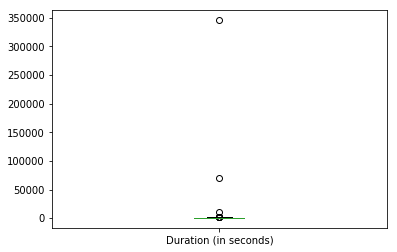

In [49]:
Dur.plot.box()

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyers zu erkennen -> sollen nicht mit berücksichtigt werden (z.B. TN, die an einem Tag begonnen und später beendet haben...)

sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen

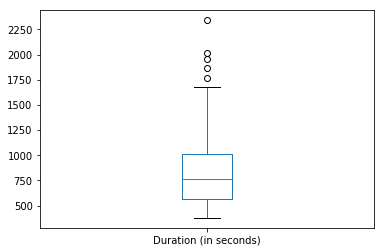

In [50]:
Dur[Dur < 4000].plot.box()

In [51]:
Dur[Dur < 4000].describe()

count      54.000000
mean      896.203704
std       454.417412
min       377.000000
25%       564.000000
50%       761.000000
75%      1014.500000
max      2341.000000
Name: Duration (in seconds), dtype: float64

In [71]:
896/60

14.933333333333334

Schlussfolgerung:

Die durchschnittliche Beantwortungszeit liegt bei ca. 15min, wobei große Unterschiede zwischen den TN beobachtet werden können, die unter anderem auf unterschiedliche Situationen, in denen beantwortet wurde, zurückzuführen sein können.

### Analyse der Angaben zur Strategiennutzung der Lernenden

In [53]:
Daten[Daten[Liste_A_Q1] != 0][Liste_A_Q1].describe()

,A-Q1_1,A-Q1_2,A-Q1_3,A-Q1_4,A-Q1_5,A-Q1_6,A-Q1_7,A-Q1_8,A-Q1_9
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,56.000000,56.000000,55.000000
mean,2.912281,3.280702,3.245614,3.122807,3.912281,3.596491,4.232143,3.607143,3.745455
std,1.106486,0.674918,0.762531,0.825274,0.931219,1.099670,0.713279,1.021204,1.057919
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


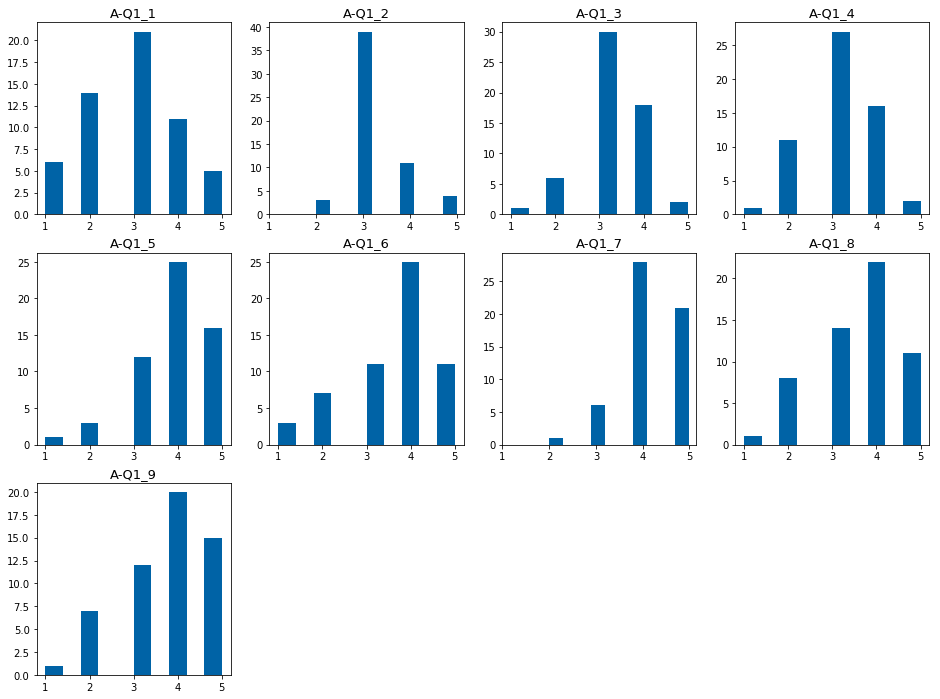

In [54]:
graf_hist(Daten[Daten[Liste_A_Q1] != 0],Liste_A_Q1,16,12,3,4)

1
Los estudiantes descubren el significado o la función de palabras nuevas en alemán gracias a su lengua materna.

2
Los estudiantes comprenden palabras nuevas en alemán con la ayuda de otras lenguas.

3
Los estudiantes utilizan sus conocimientos de alemán, p. ej. otras palabras conocidas, las partes de la oración o la formación de palabras compuestas.

4
Los estudiantes utilizan información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto.

5
Los estudiantes le piden ayuda a usted o a otro/a profesor/a.

6
Los estudiantes piden ayuda a sus compañeros/as de clase.

7
Los estudiantes consultan un diccionario u otra fuente (en papel o digital).

8
Detecto claras diferencias individuales entre los estudiantes en cuanto al uso de las estrategias.

9
Detecto claras diferencias en el uso de las estrategias entre los distintos grupos de estudiantes, p. ej. principiantes - avanzados. 

Korrelation in A-Q1:

In [55]:
Korr_A_Q1 = Daten[Liste_A_Q1].corr(method = 'spearman')
Korr_A_Q1

,A-Q1_1,A-Q1_2,A-Q1_3,A-Q1_4,A-Q1_5,A-Q1_6,A-Q1_7,A-Q1_8,A-Q1_9
A-Q1_1,1.000000,0.061026,0.133568,0.112598,0.238019,0.181021,-0.045611,-0.166188,-0.096314
A-Q1_2,0.061026,1.000000,0.258053,0.330217,0.446363,0.040218,0.174102,0.050909,0.081795
A-Q1_3,0.133568,0.258053,1.000000,0.480294,0.183095,0.065099,-0.070927,0.198303,0.192205
A-Q1_4,0.112598,0.330217,0.480294,1.000000,0.151274,-0.146442,-0.170321,0.163822,0.249874
A-Q1_5,0.238019,0.446363,0.183095,0.151274,1.000000,0.326999,0.187362,-0.065321,0.143310
A-Q1_6,0.181021,0.040218,0.065099,-0.146442,0.326999,1.000000,-0.040420,0.053246,0.105193
A-Q1_7,-0.045611,0.174102,-0.070927,-0.170321,0.187362,-0.040420,1.000000,-0.086684,0.090811
A-Q1_8,-0.166188,0.050909,0.198303,0.163822,-0.065321,0.053246,-0.086684,1.000000,0.471077
A-Q1_9,-0.096314,0.081795,0.192205,0.249874,0.143310,0.105193,0.090811,0.471077,1.000000


In [56]:
for col in Liste_A_Q1:
    print(get_max_corr(Korr_A_Q1,col,0.5))

Series([], Name: A-Q1_1, dtype: float64)
Series([], Name: A-Q1_2, dtype: float64)
Series([], Name: A-Q1_3, dtype: float64)
Series([], Name: A-Q1_4, dtype: float64)
Series([], Name: A-Q1_5, dtype: float64)
Series([], Name: A-Q1_6, dtype: float64)
Series([], Name: A-Q1_7, dtype: float64)
Series([], Name: A-Q1_8, dtype: float64)
Series([], Name: A-Q1_9, dtype: float64)


### Erschließungsstrategien im Unterricht

#### B-Q1 (32 Einzelstrategien)

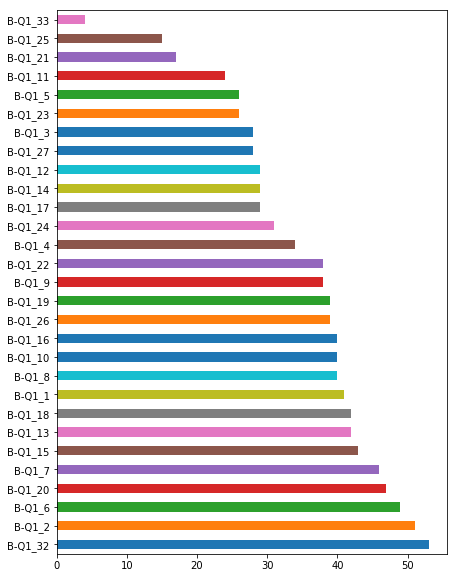

In [100]:
Daten[Liste_B_Q1].sum(axis=0).sort_values(ascending=False).plot(kind='barh', figsize=(7,10));

#### B-Q2 (Methoden)

In [57]:
Daten[Daten[Liste_B_Q2] != 0][Liste_B_Q2].describe()

,B-Q2_1,B-Q2_2,B-Q2_3,B-Q2_4,B-Q2_5,B-Q2_6,B-Q2_8
count,56.000000,57.000000,57.000000,57.000000,57.00000,57.000000,57.000000
mean,3.428571,3.140351,3.596491,2.859649,2.54386,3.140351,3.210526
std,1.024378,1.355394,1.131681,1.245543,1.16604,1.140780,1.346117
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,2.000000,2.00000,3.000000,2.000000
50%,3.000000,3.000000,4.000000,3.000000,2.00000,3.000000,3.000000
75%,4.000000,4.000000,5.000000,4.000000,3.00000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000


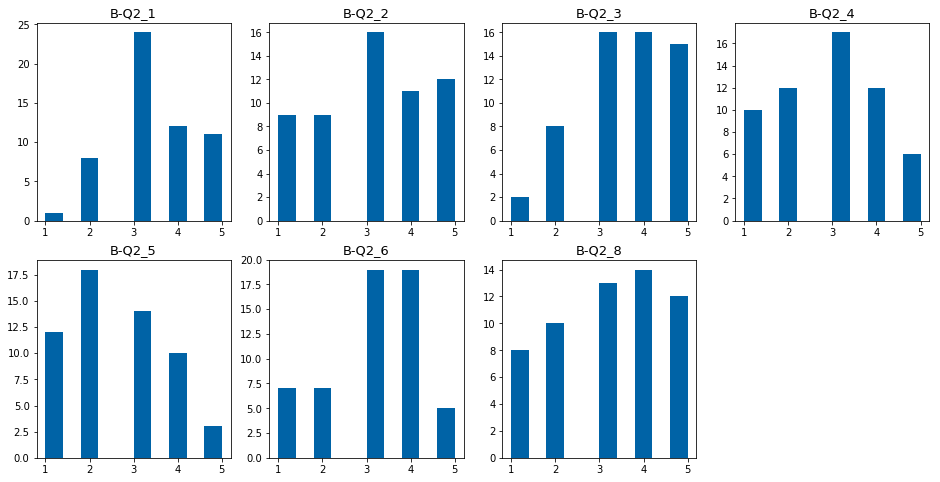

In [58]:
graf_hist(Daten[Daten[Liste_B_Q2] != 0],Liste_B_Q2,16,8,2,4)

1
Estas estrategias se presentan (y explican) en clase.

2
Los estudiantes reciben consejos sobre cómo familiarizarse de manera autónoma con estas estrategias, p. ej. mediante páginas web, libros u otros materiales sobre estrategias de aprendizaje. 

3
Estas estrategias se explican y se practican con ejemplos conretos, realizando tareas, p. ej. leyendo un texto difícil.

8
Se pregunta a los estudiantes sobre sus conocimientos previos, p. ej. qué estrategias conocen y/o saben utilizar. 

4
Se prueban y se comparan diferentes estrategias.

5
Se reflexiona sobre el uso de estas estrategias, p. ej. sobre qué estrategia sería adecuada en una situación y/o para una persona determinada.

6
Los estudiantes adquieren estas estrategias de manera inconsciente durante las clases, p. ej. mientras leen textos difíciles, sin que se requiera una explicación o indicación específica.

Korrelation in B-Q2:

In [59]:
Korr_B_Q2 = Daten[Liste_B_Q2].corr(method = 'spearman')
Korr_B_Q2

,B-Q2_1,B-Q2_2,B-Q2_3,B-Q2_4,B-Q2_5,B-Q2_6,B-Q2_8
B-Q2_1,1.000000,0.311883,0.510349,0.460143,0.436681,-0.179549,0.342957
B-Q2_2,0.311883,1.000000,0.423075,0.506595,0.560977,-0.116062,0.425525
B-Q2_3,0.510349,0.423075,1.000000,0.494464,0.454988,-0.156597,0.349275
B-Q2_4,0.460143,0.506595,0.494464,1.000000,0.722663,-0.099747,0.600651
B-Q2_5,0.436681,0.560977,0.454988,0.722663,1.000000,-0.089832,0.530554
B-Q2_6,-0.179549,-0.116062,-0.156597,-0.099747,-0.089832,1.000000,0.071078
B-Q2_8,0.342957,0.425525,0.349275,0.600651,0.530554,0.071078,1.000000


In [60]:
for col in Liste_B_Q2:
    print(get_max_corr(Korr_B_Q2,col,0.6))

Series([], Name: B-Q2_1, dtype: float64)
Series([], Name: B-Q2_2, dtype: float64)
Series([], Name: B-Q2_3, dtype: float64)
B-Q2_5    0.722663
B-Q2_8    0.600651
Name: B-Q2_4, dtype: float64
B-Q2_4    0.722663
Name: B-Q2_5, dtype: float64
Series([], Name: B-Q2_6, dtype: float64)
B-Q2_4    0.600651
Name: B-Q2_8, dtype: float64


#### B-Q3 (Quellen und Material)

In [61]:
Daten[Daten[Liste_B_Q3] != 0][Liste_B_Q3].describe()

,B-Q3_1,B-Q3_2,B-Q3_3,B-Q3_4,B-Q3_5,B-Q3_6,B-Q3_7,B-Q3_8
count,57.000000,55.000000,56.000000,57.000000,51.000000,54.000000,56.000000,55.000000
mean,2.578947,2.636364,2.660714,2.964912,2.901961,2.277778,2.821429,2.763636
std,1.164158,1.324465,1.391883,1.133341,1.253075,1.337650,1.322630,1.490260
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000
75%,3.000000,3.500000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [62]:
Daten[Daten[Liste_B_Q3] != 0][Liste_B_Q3].mean().sort_values(ascending = False)

B-Q3_4    2.964912
B-Q3_5    2.901961
B-Q3_7    2.821429
B-Q3_8    2.763636
B-Q3_3    2.660714
B-Q3_2    2.636364
B-Q3_1    2.578947
B-Q3_6    2.277778
dtype: float64

In [63]:
for col in Liste_B_Q3:
    print(Daten[Daten[col] >= 3].shape[0])

29
27
27
38
31
19
30
30


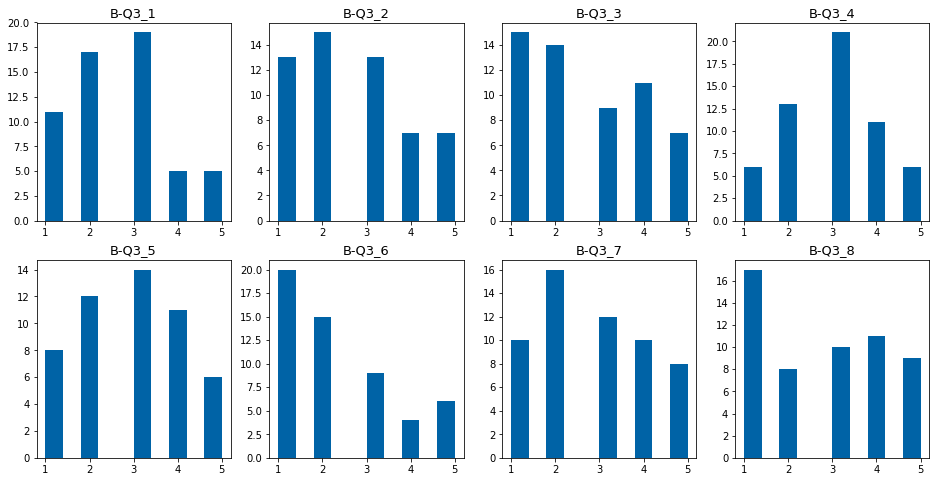

In [64]:
graf_hist(Daten[Daten[Liste_B_Q3] != 0],Liste_B_Q3,16,8,2,4)

1
Estas estrategias se trataron durante mis estudios.

2
Estas estrategias se trataron durante mi formación como docente.

3
Estas estrategias se trataron en cursos de formación continua de profesorado.

4
En los libros de texto que utilizo se tratan estas estrategias. 

5
En los manuales del profesor que utilizo se tratan estas estrategias. 

6
Utilizo páginas web o blogs que tratan estas estrategias.

7
Utilizo libros, revistas u otros materiales didácticos que tratan estas estrategias.

8
He desarrollado material propio para la enseñanza de estas estrategias.

##### Gruppierung der Strategien nach Kategorien:

In [65]:
strat = {'S1': ['A-Q3_5','A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9'], 
         'S2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
         'S3': ['A-Q3_9','A-Q3_10','A-Q3_11','A-Q3_12'],
         'S4': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S4a': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16'],
         'S4b': ['A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24','A-Q3_25'],
         'S6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

* S1: Auf Wortebene - intralingual
* S2: Auf Wortebene - interlingual
* S3: Auf Satz- und Textebene - engerer Kontext
* S4: Auf Satz- und Textebene - weiterer Kontext (S4a: intratextuell, S4b: Bezug zu Fach- und Weltwissen)
* S5: Außersprachlicher Kontext
* S6: Metakognitive Strategien

In [66]:
#Daten_A3.loc[56, strat['S1']]

In [67]:
#Berechnung der Summe der Werte, des Mittelwerts und der Anzahl an Items mit einem bestimmten Wert (individuell):
#Daten.loc[56, strat['S1']].sum()
#Daten.loc[56, strat['S1']].mean()
#(Daten.loc[56, strat['S1']] >= 5).sum()

In [68]:
#Anzahl der TN, die einen Mittelwert >= 3 in der Strategiengruppe S1 aufweisen:
#Daten[Daten[strat['S1']].mean(axis=1) >= 3]

In [69]:
#Anzahl de#Anzahl der TN, die einen Mittelwert >= 3 in der Strategiengruppe S1 aufweisen:r TN, deren Summe der Werte in S1 >= 8 ist:
#Daten[Daten[strat['S1']].sum(axis=1) >= 8].shape[0]

##### Bandbreite und Frequenz der Strategiennutzung:

In der Folge wird berechnet, wie viele TN pro Strategiengruppe mit ihren Angaben einen Durchschnittswert von 3 (Likert) aufweisen und eine Mindestanzahl an Einzelstrategien pro Gruppe mit 3 bewertet haben.

In [70]:
Daten_A3[(Daten_A3[strat['S1']].mean(axis=1) >= 3) & ((Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2)].shape[0]

NameError: name 'Daten_A3' is not defined

In [ ]:
Daten_A3[(Daten_A3[strat['S2']].mean(axis=1) >= 3) & ((Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2)].shape[0]

In [ ]:
Daten_A3[(Daten_A3[strat['S3']].mean(axis=1) >= 3) & ((Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2)].shape[0]

In [ ]:
Daten_A3[(Daten_A3[strat['S4']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4)].shape[0]

In [ ]:
Daten_A3[(Daten_A3[strat['S4a']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4a']] >= 3).sum(axis=1) >= 2)].shape[0]

In [ ]:
Daten_A3[(Daten_A3[strat['S4b']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4b']] >= 3).sum(axis=1) >= 2)].shape[0]

In [ ]:
Daten_A3[(Daten_A3[strat['S5']].mean(axis=1) >= 3) & ((Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2)].shape[0]

In [ ]:
Daten_A3[(Daten_A3[strat['S6']].mean(axis=1) >= 3) & ((Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3)].shape[0]

Anzahl der TN, die in jeder Strategiengruppe einen Durchschnittswert von mindestens 2 (Likert) aufweisen und eine Mindestanzahl an Strategien mit 3 bewertet haben:

In [ ]:
Daten_A3[(Daten_A3[strat['S1']].mean(axis=1) >= 2) & ((Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S2']].mean(axis=1) >= 2) & ((Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S3']].mean(axis=1) >= 2) & ((Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S4']].mean(axis=1) >= 2) & ((Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4) & (Daten_A3[strat['S5']].mean(axis=1) >= 2) & ((Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S6']].mean(axis=1) >= 2) & ((Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3)].shape[0]

Anzahl der TN, die eine Mindestanzahl an Strategien aus jeder Strategiengruppe mit 3 (Likert) bewertet haben:

In [ ]:
St_pos = Daten_A3[((Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2) & ((Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2) & ((Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2) & ((Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4) & ((Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2) & ((Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3)]

In [ ]:
St_pos.shape[0]

In [ ]:
Daten_A3.shape[0]

In [ ]:
(St_pos.shape[0])/(Daten_A3.shape[0])*100

### Einstellung zu Erschließungsstrategien

#### C-Q1

In [ ]:
Daten[Liste_C_Q1].describe()

In [ ]:
graf_hist(Daten[Daten[Liste_C_Q1] != 0],Liste_C_Q1,16,12,3,4)

1
Estas estrategias son un tema importante en mis clases de alemán.  

2
Tratar estas estrategias es especialmente importante en niveles inferiores.

3
Tratar estas estrategias es especialmente importante en niveles intermedios.

4
Tratar estas estrategias es especialmente importante en niveles avanzados.

5
No hace falta enseñar estas estrategias de forma explícita, ya que los estudiantes las usan en cualquier caso de forma inconsciente.

6
En mis clases se trabaja con textos complejos que requieren el uso de estrategias para descubrir palabras desconocidas por parte de los estudiantes.

7
Estas estrategias son útiles para ampliar el vocabulario.

8
Estas estrategias son útiles para mejorar la comprensión lectora.

9
Utilizo material adaptado al nivel de mis estudiantes para que lo entiendan sin tener que utilizar estrategias de inferencia complicadas.

10
Fomentando el uso de estas estrategias se favorece el aprendizaje autónomo.

Korrelation in C-Q1:

In [ ]:
Korr_C_Q1 = Daten[Liste_C_Q1].corr(method = 'spearman')
Korr_C_Q1

In [ ]:
for col in Liste_C_Q1:
    print(get_max_corr(Korr_C_Q1,col,0.5))

### Charakteristika der Stichprobe

In [ ]:
Finished[Finished['D-Q1'] != 0]['D-Q1'].value_counts().plot(kind='bar', 
                                                            figsize = (12,5), width = 0.5, 
                                                            legend = True, title = "Universität");

(1)	Abat Oliba-CEU
(2)	Alcalá de Henares
(3)	Alfonso X El Sabio
(4)	Alicante
(5)	Almería
(6)	Antonio de Nebrija
(7)	Autónoma de Barcelona
(8)	Autónoma de Madrid
(9)	Barcelona
(10)	Burgos
(11)	Cádiz
(12)	Camilo José Cela
(13)	Cantabria
(14)	Cardenal Herrera-CEU
(15)	Carlos III
(16)	Castilla-La Mancha
(17)	Católica de Ávila
(18)	Católica de Valencia
(19)	Católica S. Antonio de Murcia
(20)	Complutense de Madrid
(21)	Córdoba
(22)	Coruña, A
(23)	Deusto
(24)	Europea de Madrid
(25)	Europea Miguel de Cervantes
(26)	Extremadura
(27)	Francisco de Vitoria
(28)	Girona
(29)	Granada
(30)	Huelva
(31)	IE Universidad
(32)	Illes Balears
(33)	Internacional de Catalunya
(34)	Internacional de La Rioja
(35)	Internacional Valenciana
(36)	Jaén
(37)	Jaume I de Castellón
(38)	La Laguna
(39)	La Rioja
(40)	León
(41)	Lleida
(42)	Málaga
(43)	Miguel Hernández de Elche
(44)	Mondragón
(45)	Murcia
(46)	Navarra
(47)	Oberta de Catalunya
(48)	Oviedo
(49)	Pablo de Olavide
(50)	País Vasco
(51)	Palmas (Las)
(52)	Politécnica de Cartagena
(53)	Politécnica de Cataluña
(54)	Politécnica de Madrid
(55)	Politécnica de Valencia
(56)	Pompeu Fabra
(57)	Pontificia Comillas
(58)	Pontificia de Salamanca
(59)	Pública de Navarra
(60)	Ramón Llull
(61)	Rey Juan Carlos
(62)	Rovira i Virgili
(63)	Salamanca
(64)	San Jorge
(65)	San Pablo-CEU
(66)	Santiago de Compostela
(67)	Sevilla
(68)	U.N.E.D.
(69)	UDIMA
(70)	Valencia (Est. General)
(71)	Valladolid
(72)	Vic
(73)	Vigo
(74)	Zaragoza
(75)	Otra

In [ ]:
Finished['D-Q1'].value_counts()

In [ ]:
Finished['D-Q1'].nunique()

In [ ]:
Finished['D-Q1a'].value_counts()

Studierende aus 18 verschiedenen Universitäten nahmen an der Befragung teil.

In [ ]:
Finished['D-Q2'].value_counts()[[1,2,3,4]].plot(kind = 'bar', figsize = (5,5), width = 0.4, legend = True, title = "Studium");

(1)	Grado
(2)	Posgrado/Máster 
(3)	Doctorado
(4)	Otros

In [ ]:
Finished['D-Q2'].value_counts()

In [ ]:
Finished['D-Q2a'].value_counts().reindex([1,2,3,4,5,6,7,8]).plot(kind='bar', figsize = (7,5), width = 0.5, legend = True, title = "Studienrichtung");

(1) Estudios Alemanes / Filología Alemana (Germanistikstudium / deutsche Philologie), (2) Otras Filologías (Anderes Philologiestudium), (3) Traducción, Alemán 1a Lengua Extranjera / B (Übersetzen und Dolmetschen, Erste Fremdsprache / Sprache B), (4) Traducción, Alemán 2a Lengua Extranjera / C (Übersetzen und Dolmetschen, Zweite Fremdsprache / Sprache C), (5) Humanidades (Humanistisches Studium), (6) Economía (Wirtschaftliches Studium), (7) Turismo (Tourismus-Studium), (8) Otra (Andere)

In [ ]:
Finished[Finished['D-Q2a'] !=0]['D-Q2a'].value_counts().plot(kind='bar', figsize = (7,5), width = 0.5, legend = True, title = "Studienrichtung");

In [ ]:
Finished['D-Q2a'].value_counts()

In [ ]:
Finished['D-Q2b'].value_counts()[[1,2,3,4]].plot(kind='bar', figsize = (5,5), width = 0.4, legend = True, title = "Studienjahr");

In [ ]:
Finished['D-Q2b'].value_counts()

In [ ]:
Finished['D-Q3'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Art des Deutschkurses");

(1) Pflichtfach, (2) Wahlfach, (3) extracurricularer Kurs

In [ ]:
Finished['D-Q3'].value_counts()

In [ ]:
Finished['D-Q4'].value_counts()[[1,2,3,4,5,6]].plot(kind='bar', figsize = (6,5), width = 0.5, legend = True, title = "Niveau des aktuellen Deutschkurses");

(1)	A1, 
(2)	A2, 
(3)	B1, 
(4)	B2, 
(5)	C1,
(6)	C2 

In [ ]:
Finished['D-Q4'].value_counts()

In [ ]:
Finished[Finished['D-Q5'] != 0]['D-Q5'].describe()

In [ ]:
Finished[Finished['D-Q5'] != 0]['D-Q5'].astype(integer).value_counts().sort_index().plot(kind='bar', figsize = (15,5), legend = True, title = "Alter");

In [ ]:
Finished['D-Q6'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Geschlecht");

In [ ]:
Finished['D-Q6'].value_counts()

In [ ]:
Finished[Finished['D-Q7'] != 0]['D-Q7'].value_counts().plot(kind='bar', figsize = (10,5), legend = True, title = "Erstsprachen (1)");

(1) 	Castellano
(2) 	Catalán (Català), Valenciano (Valencià)
(3) 	Gallego (Galego)
(4) 	Vasco (Euskara)
(5) 	Alemán (Deutsch)
(6) 	Árabe (العربية)
(7) 	Chino mandarín (中文)
(8) 	Coreano (한국어)
(9) 	Danés (Dansk)
(10) 	Francés (Français)
(11) 	Griego moderno (Ελληνικά)
(12) 	Inglés (English)
(13) 	Italiano (Italiano)
(14) 	Japonés (日本語)
(15) 	Neerlandés (Nederlands)
(16) 	Portugués (Português)
(17) 	Rumano (Română)
(18) 	Ruso (Русский)
(19) 	Sueco (Svenska)
(20) 	Griego antiguo (Aρχαία Eλληνική)
(21) 	Latín (Latina)
(22) 	Armenio (Հայերեն)
(23) 	Búlgaro (Български)
(24) 	Checo (Česky)
(25) 	Croata (Hrvatski)
(26) 	Eslovaco (Slovenčina)
(27) 	Esloveno (Slovenščina)
(28) 	Estonio (Eesti)
(29) 	Finés (Suomi)
(30) 	Galés (Cymraeg)
(31) 	Hindi (हिन्दी)
(32) 	Húngaro (Magyar)
(33) 	Irlandés (Gaeilge)
(34) 	Letón (Latviešu)
(35) 	Lituano (Lietuvių)
(36) 	Luxemburgués (Lëtzebuergesch)
(37) 	Maltés (bil-Malti)
(38) 	Moldavo (Moldoveana)
(39) 	Noruego (Norsk)
(40) 	Occitano (Occitan)
(41) 	Polaco (Polski)
(42) 	Persa (فارسی)
(43) 	Turco (Türkçe)
(44) 	Ucraniano (Українська)
(45) 	Urdu (اردو)
(46) 	Otro

In [ ]:
Finished['D-Q7'].value_counts()

In [ ]:
Finished['D-Q7b'].value_counts()

In [ ]:
Finished[Finished['D-Q7c'] != 0]['D-Q7c'].value_counts().plot(kind='bar', figsize = (10,5), legend = True, title = "Erstsprachen (2)");

In [ ]:
Finished[Finished['D-Q7c'] != 0]['D-Q7c'].value_counts()

In [ ]:
Finished[Finished['D-Q7e'] != 0]['D-Q7e'].value_counts()

In [ ]:
Finished[Finished['D-Q7f'] != 0]['D-Q7f'].value_counts()

Otro = Guaraní

In [ ]:
Sprachen = Finished[['D-Q8_1','D-Q8_2','D-Q8_3','D-Q8_4','D-Q8_5','D-Q8_6','D-Q8_7']]

In [ ]:
DF_Spr = Sprachen.apply(pd.value_counts).fillna(0).astype(integer)

In [ ]:
ix_sorted = list(DF_Spr[1:].sum(axis = 1).sort_values(ascending=False).index)

In [ ]:
All = []
for i in DF_Spr.index:
    All.append((DF_Spr.loc[i]).sum())

In [ ]:
DF_Spr['All'] = All

In [ ]:
DF_Spr[1:]

In [ ]:
cols = ['D-Q8_1','D-Q8_2','D-Q8_3','D-Q8_4','D-Q8_5','D-Q8_6','D-Q8_7']

In [ ]:
DF_Spr[cols][1:].plot(kind='bar', figsize = (15,10), stacked = True, legend = True, title = "Sprachkenntnisse");

In [ ]:
DF_Spr.loc[ix_sorted[:10]]

In [ ]:
DF_Spr[cols].loc[ix_sorted[:10]].plot(kind='bar', figsize = (10,8), stacked = True, legend = True, title = "Sprachkenntnisse");

In [ ]:
#Finished['D-Q9'].value_counts()[[1,2]].plot(kind = 'bar', figsize = (3,5), width = 0.4, legend = True, title = "Erhebungssituation");

(1)	Während der Unterrichtszeit,
(2)	Außerhalb des Unterrichts

In [ ]:
Finished['D-Q9_1'].value_counts()

In [ ]:
Finished['D-Q9_2'].value_counts()